In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [49]:
from pint import UnitRegistry
ureg = UnitRegistry()

In [54]:
link = "http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html"
df = pd.read_html(link,header=0,index_col=0)[0]
df

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


In [56]:
def convert(s):
    feet = ureg.convert(s["Height(Inches)"],"inch","feet")
    inch = np.round(feet % 1,5)
    feet = int(feet)
    
    s["Height(Inches)"] = inch
    s["Height(Feet)"] = feet
    s["Weight(Kilogram)"] = ureg.convert(s["Weight(Pounds)"],"pound","kilogram")
    return s

df = df.apply(convert,axis=1)

In [59]:
df = df.drop(["Weight(Pounds)"],axis=1)
df

,Height(Inches),Height(Feet),Weight(Kilogram)
Index,,,
1,0.48194,5.0,51.252536
2,0.95960,5.0,61.909598
3,0.78323,5.0,69.411834
4,0.68472,5.0,64.562251
5,0.64898,5.0,65.452064
...,...,...,...
24996,0.79185,5.0,53.538052
24997,0.37902,5.0,54.518718
24998,0.39155,5.0,53.644328


In [86]:
X = df[["Height(Inches)","Height(Feet)"]].values
X_b = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
X_b

array([[1.     , 0.48194, 5.     ],
       [1.     , 0.9596 , 5.     ],
       [1.     , 0.78323, 5.     ],
       ...,
       [1.     , 0.39155, 5.     ],
       [1.     , 0.62743, 5.     ],
       [1.     , 0.7398 , 5.     ]])

In [87]:
y = df["Weight(Kilogram)"].values
y

array([51.25253587, 61.90959788, 69.41183424, ..., 53.64432843,
       59.99584631, 56.64198433])

In [88]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([-36.5786199 ,  16.84835314,  16.60049133])

In [89]:
intercept, *coef = theta_best
print(f"Intercept: {intercept}")
print(f"Coefficients: {coef}")

Intercept: -36.57861990472725
Coefficients: [16.848353138577988, 16.600491329827932]


In [90]:
y_pred = X_b.dot(theta_best)
y_pred

array([54.54373206, 62.59151642, 59.61997237, ..., 53.02080942,
       56.99499895, 58.8882484 ])

In [95]:
from sklearn.metrics import mean_squared_error

print(f"Root Mean Squared Error {np.sqrt(mean_squared_error(y,y_pred))}")

Root Mean Squared Error 4.571710221410258


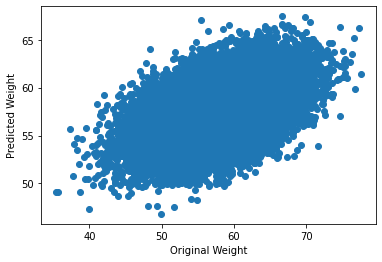

In [100]:
plt.scatter(y,y_pred)
plt.xlabel("Original Weight")
plt.ylabel("Predicted Weight")